In [1]:
import urllib3
from bs4 import BeautifulSoup as beautifulsoup
import nltk
from nltk.util import ngrams
from nltk import FreqDist
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from collections import Counter
import numpy as np

In [2]:
http = urllib3.PoolManager()
r = http.request('GET', 'https://ethereum.org/en/whitepaper/')

In [3]:
soup = beautifulsoup(r.data, "html5lib")

In [4]:
for s in soup.select('script'):
    s.extract()

In [5]:
[s.extract() for s in soup(['script', 'iframe', 'link', 'style', 'a', 'img', 'svg'])]

[<link data-react-helmet="true" href="https://ethereum.org" hreflang="x-default" rel="alternate"/>,
 <link data-react-helmet="true" href="https://ethereum.org/en/whitepaper/" hreflang="en" rel="alternate"/>,
 <link data-react-helmet="true" href="https://ethereum.org/ar/whitepaper/" hreflang="ar" rel="alternate"/>,
 <link data-react-helmet="true" href="https://ethereum.org/az/whitepaper/" hreflang="az" rel="alternate"/>,
 <link data-react-helmet="true" href="https://ethereum.org/bg/whitepaper/" hreflang="bg" rel="alternate"/>,
 <link data-react-helmet="true" href="https://ethereum.org/bn/whitepaper/" hreflang="bn" rel="alternate"/>,
 <link data-react-helmet="true" href="https://ethereum.org/ca/whitepaper/" hreflang="ca" rel="alternate"/>,
 <link data-react-helmet="true" href="https://ethereum.org/cs/whitepaper/" hreflang="cs" rel="alternate"/>,
 <link data-react-helmet="true" href="https://ethereum.org/da/whitepaper/" hreflang="da" rel="alternate"/>,
 <link data-react-helmet="true" href

In [6]:
content_array = [text for text in soup.stripped_strings]

In [7]:
tokens = [t for l in content_array for t in l.split() ] 

In [8]:
freq = nltk.FreqDist(tokens)

In [9]:
tl = len(tokens)

In [10]:
sum(freq.values())

13985

In [11]:
probs = {k: v/tl for (k,v) in freq.items()}

In [12]:
from operator import itemgetter
sprobs = dict(sorted(probs.items(), key=itemgetter(1), reverse=True))

In [13]:
pvals = list(sprobs.values())
cumprobs = {k: sum(pvals[0:ix+1]) for ix, (k,v) in enumerate(sprobs.items())}

In [14]:
import random
random.seed(42)
random.random()

0.6394267984578837

In [15]:
keys = list(cumprobs.keys())
values = cumprobs.values()
for i in range(10):
    rn = random.random();
    ix = [i for (i, v) in enumerate(values) if v > rn][0]
    # print(rn, ix, keys[ix])
    print(keys[ix])

the
with
in
her
designed
proxy
of
contracts
the
in


In [16]:
with open("5 papers related to blockchain.txt", "r") as f:
    corpus = f.read()

In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yaswa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
def compute_perplexity(model, test_set):
    n = len(test_set)
    log_likelihood = sum([np.log(model[word_pair]) for word_pair in test_set])
    perplexity = np.exp(-log_likelihood/n)
    return perplexity

# Define a function to compute diversity score
def compute_diversity(model):
    n = len(model.keys())
    count = sum(model.values())
    diversity = count/n
    return diversity

In [19]:
tokens = nltk.word_tokenize(corpus)

In [20]:
n = 2
bigrams = list(ngrams(tokens, n))

for item in bigrams:
    print(item)

('Towards', 'a')
('a', 'Framework')
('Framework', 'for')
('for', 'Understanding')
('Understanding', 'the')
('the', 'Performance')
('Performance', 'of')
('of', 'Blockchains')
('Blockchains', 'M.')
('M.', 'Touloupou')
('Touloupou', ',')
(',', 'K.')
('K.', 'Christodoulou')
('Christodoulou', ',')
(',', 'A.')
('A.', 'Inglezakis')
('Inglezakis', ',')
(',', 'E.')
('E.', 'Iosif')
('Iosif', 'and')
('and', 'M.')
('M.', 'Themistocleous')
('Themistocleous', ',')
(',', '``')
('``', 'Towards')
('Towards', 'a')
('a', 'Framework')
('Framework', 'for')
('for', 'Understanding')
('Understanding', 'the')
('the', 'Performance')
('Performance', 'of')
('of', 'Blockchains')
('Blockchains', ',')
(',', "''")
("''", '2021')
('2021', '3rd')
('3rd', 'Conference')
('Conference', 'on')
('on', 'Blockchain')
('Blockchain', 'Research')
('Research', '&')
('&', 'Applications')
('Applications', 'for')
('for', 'Innovative')
('Innovative', 'Networks')
('Networks', 'and')
('and', 'Services')
('Services', '(')
('(', 'BRAINS')

In [29]:
for i in range(5):
    sentence = []
    # Choose a random starting bigram that starts with a capital letter
    while True:
        starting_bigram = random.choice(bigrams)
        if starting_bigram[0][0].isupper():
            sentence.extend(starting_bigram)
            break
    # Continue generating bigrams until the end of a sentence is reached
    while len(sentence) < 10:
        current_word = sentence[-1]
        # Find all bigrams that start with the current word
        possible_bigrams = [bigram for bigram in bigrams if bigram[0] == current_word]
        if possible_bigrams:
            # Choose a random bigram from the possible bigrams based on its frequency distribution
            freq_dist = FreqDist(possible_bigrams)
            next_bigram = freq_dist.max()
            sentence.append(next_bigram[1])
        else:
            # If no possible bigrams are found, end the sentence
            sentence.append(".")
            break
    # Join the words in the sentence and print it
    print(" ".join(sentence))
print("\nAverage sentence length:", sum(len(s.split()) for s in sentence) / len(sentence))
print("Percentage of unique sentences:", len(set(sentence)) / len(sentence))


Trending Contracts Repository For this paper introduces an important to
Because after the blockchain technology , and the blockchain technology
ICOs , and the blockchain technology , and the blockchain
Introduction Academic certification , and the blockchain technology , and
This governance in the blockchain technology , and the blockchain

Average sentence length: 1.0
Percentage of unique sentences: 0.8


Perplexity score:  0.4833749577890225
Diversity score:  1.5129287598944592


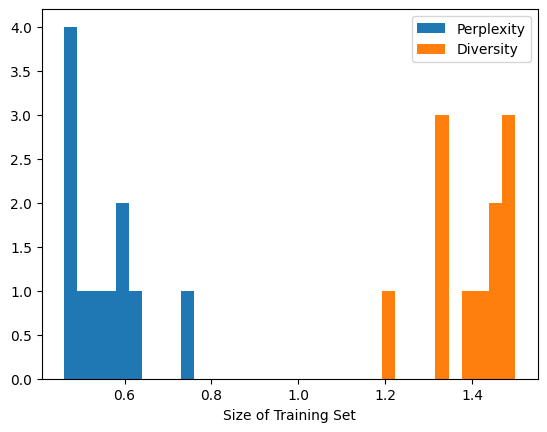

In [30]:
model = FreqDist(bigrams)
test_set = bigrams[:1000]
perplexity = compute_perplexity(model, test_set)
diversity = compute_diversity(model)

# Print results
print("Perplexity score: ", perplexity)
print("Diversity score: ", diversity)

# Plot perplexity and diversity scores over time
perplexity_scores_bi = []
diversity_scores_bi = []
for i in range(1000, len(bigrams), 1000):
    test_set = bigrams[:i]
    model = FreqDist(test_set)
    perplexity = compute_perplexity(model, test_set)
    diversity = compute_diversity(model)
    perplexity_scores_bi.append(perplexity)
    diversity_scores_bi.append(diversity)

plt.hist(perplexity_scores_bi, label='Perplexity')
plt.hist(diversity_scores_bi, label='Diversity')
plt.xlabel('Size of Training Set')
plt.legend()
plt.show()

In [23]:
n = 3
trigrams = list(ngrams(tokens, n))

for item in trigrams:
    print(item)

('Towards', 'a', 'Framework')
('a', 'Framework', 'for')
('Framework', 'for', 'Understanding')
('for', 'Understanding', 'the')
('Understanding', 'the', 'Performance')
('the', 'Performance', 'of')
('Performance', 'of', 'Blockchains')
('of', 'Blockchains', 'M.')
('Blockchains', 'M.', 'Touloupou')
('M.', 'Touloupou', ',')
('Touloupou', ',', 'K.')
(',', 'K.', 'Christodoulou')
('K.', 'Christodoulou', ',')
('Christodoulou', ',', 'A.')
(',', 'A.', 'Inglezakis')
('A.', 'Inglezakis', ',')
('Inglezakis', ',', 'E.')
(',', 'E.', 'Iosif')
('E.', 'Iosif', 'and')
('Iosif', 'and', 'M.')
('and', 'M.', 'Themistocleous')
('M.', 'Themistocleous', ',')
('Themistocleous', ',', '``')
(',', '``', 'Towards')
('``', 'Towards', 'a')
('Towards', 'a', 'Framework')
('a', 'Framework', 'for')
('Framework', 'for', 'Understanding')
('for', 'Understanding', 'the')
('Understanding', 'the', 'Performance')
('the', 'Performance', 'of')
('Performance', 'of', 'Blockchains')
('of', 'Blockchains', ',')
('Blockchains', ',', "''")

In [38]:
for i in range(5):
    sentence = []
    # Choose a random starting trigram that starts with a capital letter
    while True:
        starting_trigram = random.choice(trigrams)
        if starting_trigram[0][0].isupper():
            sentence.extend(starting_trigram)
            break
    # Continue generating trigrams until the end of a sentence is reached
    while len(sentence) < 10:
        current_bigram = (sentence[-2], sentence[-1])
        # Find all trigrams that start with the current bigram
        possible_trigrams = [trigram for trigram in trigrams if trigram[:2] == current_bigram]
        if possible_trigrams:
            # Choose a random trigram from the possible trigrams based on its frequency distribution
            freq_dist = FreqDist(possible_trigrams)
            next_trigram = freq_dist.max()
            sentence.append(next_trigram[2])
        else:
            # If no possible trigrams are found, end the sentence
            sentence.append(".")
            break
    # Join the words in the sentence and print it
    print(" ".join(sentence))
print("\nAverage sentence length:", sum(len(s.split()) for s in sentence) / len(sentence))
print("Percentage of unique sentences:", len(set(sentence)) / len(sentence))


Smart contracts are general-purpose programs that allow secure transactions without
Its main manifestation includes the issuance , identification , and
Another interesting dataset is Smart Sanctuary 2 , 4 ]
The alternative would be retrieving contracts and consensus mechanisms and
NFTs . The system data is stored in a timely

Average sentence length: 1.0
Percentage of unique sentences: 1.0


Perplexity score:  0.8305646038985254
Diversity score:  1.1182952993953579


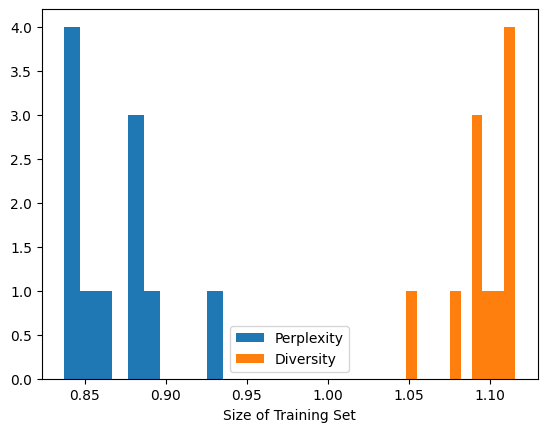

In [32]:
model = FreqDist(trigrams)

# Compute perplexity and diversity scores
test_set = trigrams[:1000]
perplexity = compute_perplexity(model, test_set)
diversity = compute_diversity(model)

# Print results
print("Perplexity score: ", perplexity)
print("Diversity score: ", diversity)

# Plot perplexity and diversity scores over time
perplexity_scores_tri = []
diversity_scores_tri = []
for i in range(1000, len(trigrams), 1000):
    test_set = trigrams[:i]
    model = FreqDist(test_set)
    perplexity = compute_perplexity(model, test_set)
    diversity = compute_diversity(model)
    perplexity_scores_tri.append(perplexity)
    diversity_scores_tri.append(diversity)

plt.hist(perplexity_scores_tri, label='Perplexity')
plt.hist(diversity_scores_tri, label='Diversity')
plt.xlabel('Size of Training Set')
plt.legend()
plt.show()

In [26]:
n = 4
fourgrams = list(ngrams(tokens, n))

for item in fourgrams:
    print(item)

('Towards', 'a', 'Framework', 'for')
('a', 'Framework', 'for', 'Understanding')
('Framework', 'for', 'Understanding', 'the')
('for', 'Understanding', 'the', 'Performance')
('Understanding', 'the', 'Performance', 'of')
('the', 'Performance', 'of', 'Blockchains')
('Performance', 'of', 'Blockchains', 'M.')
('of', 'Blockchains', 'M.', 'Touloupou')
('Blockchains', 'M.', 'Touloupou', ',')
('M.', 'Touloupou', ',', 'K.')
('Touloupou', ',', 'K.', 'Christodoulou')
(',', 'K.', 'Christodoulou', ',')
('K.', 'Christodoulou', ',', 'A.')
('Christodoulou', ',', 'A.', 'Inglezakis')
(',', 'A.', 'Inglezakis', ',')
('A.', 'Inglezakis', ',', 'E.')
('Inglezakis', ',', 'E.', 'Iosif')
(',', 'E.', 'Iosif', 'and')
('E.', 'Iosif', 'and', 'M.')
('Iosif', 'and', 'M.', 'Themistocleous')
('and', 'M.', 'Themistocleous', ',')
('M.', 'Themistocleous', ',', '``')
('Themistocleous', ',', '``', 'Towards')
(',', '``', 'Towards', 'a')
('``', 'Towards', 'a', 'Framework')
('Towards', 'a', 'Framework', 'for')
('a', 'Framework',

In [34]:

for i in range(5):
    sentence = []
    # Choose a random starting fourgram that starts with a capital letter
    while True:
        starting_fourgram = random.choice(fourgrams)
        if starting_fourgram[0][0].isupper():
            sentence.extend(starting_fourgram)
            break
    # Continue generating fourgrams until the end of a sentence is reached
    while len(sentence) < 10:
        current_trigram = (sentence[-3], sentence[-2], sentence[-1])
        # Find all fourgrams that start with the current trigram
        possible_fourgrams = [fourgram for fourgram in fourgrams if fourgram[:3] == current_trigram]
        if possible_fourgrams:
            # Choose a random fourgram from the possible fourgrams based on its frequency distribution
            freq_dist = FreqDist(possible_fourgrams)
            next_fourgram = freq_dist.max()
            sentence.append(next_fourgram[3])
        else:
            # If no possible fourgrams are found, end the sentence
            sentence.append(".")
            break
    # Join the words in the sentence and print it
    print(" ".join(sentence))
print("\nAverage sentence length:", sum(len(s.split()) for s in sentence) / len(sentence))
print("Percentage of unique sentences:", len(set(sentence)) / len(sentence))


II . BLOCKCHAIN CONCEPT AND CHARACTERISTICS . A ) The
Internet , Internet of Things , smart manufacturing , intelligent
After applying the zero-knowledge protocol to the system , and
Abstract : Most of the existing contract law and the
Considering the many problems in the current setting , the

Average sentence length: 1.0
Percentage of unique sentences: 0.8


Perplexity score:  0.9405544262086178
Diversity score:  1.0341841796698836


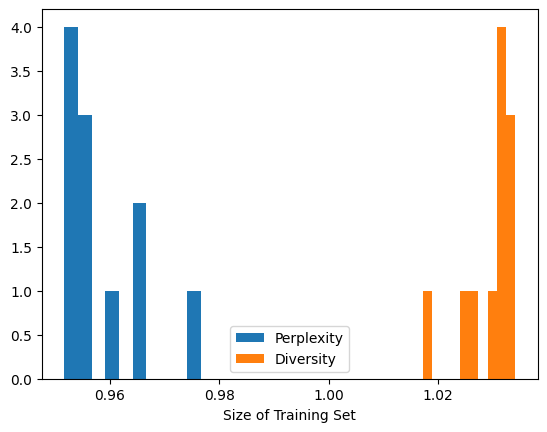

In [37]:
model = FreqDist(fourgrams)

# Compute perplexity and diversity scores
test_set = fourgrams[:1000]
perplexity = compute_perplexity(model, test_set)
diversity = compute_diversity(model)

# Print results
print("Perplexity score: ", perplexity)
print("Diversity score: ", diversity)

# Plot perplexity and diversity scores over time
perplexity_scores_four = []
diversity_scores_four = []
for i in range(1000, len(fourgrams), 1000):
    test_set = fourgrams[:i]
    model = FreqDist(test_set)
    perplexity = compute_perplexity(model, test_set)
    diversity = compute_diversity(model)
    perplexity_scores_four.append(perplexity)
    diversity_scores_four.append(diversity)

plt.hist(perplexity_scores_four, label='Perplexity')
plt.hist(diversity_scores_four, label='Diversity')
plt.xlabel('Size of Training Set')
plt.legend()
plt.show()